In [50]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm


from PIL import Image, ImageDraw
import glob
import os
import matplotlib.pyplot as plt
import math 
from math import atan,degrees,sqrt

import scipy.misc as smp
from scipy.misc import imsave

import json
from datetime import datetime

from operator import add
import re

import gmplot
from shapely import geometry

from scipy.optimize import curve_fit
from scipy.integrate import quad

from GeoLibrary import *

In [14]:
GRID_WIDTH = 512
GRID_HEIGHT = 512


# helper functions
def swapLatLon(coord):
    return (coord[1],coord[0])
def GetLatLongForCoords(x,y,top_left_lat_long, top_right_lat_long,  bottom_right_lat_long, bottom_left_lat_long, fullImageWidth, fullImageHeight):
    angle=0
    if x!=0:
        angle=atan(y/x)
    else :
        angle=1.570796 # 90 degrees in radians
    bearing=GetBearing(swapLatLon(top_left_lat_long),swapLatLon(top_right_lat_long))
    total_bearing=(bearing+degrees(angle) + 360) % 360
    distance_hor=GetDistanceMeters(swapLatLon(top_left_lat_long),swapLatLon(top_right_lat_long))
    distance_ver=GetDistanceMeters(swapLatLon(top_left_lat_long),swapLatLon(bottom_left_lat_long))
    distance_x=distance_hor/fullImageWidth*x
    distance_y=distance_ver/fullImageHeight*y
    distance_from_top_left=sqrt(distance_x**2+distance_y**2)
    retLatLon=GetLatLongFromPointBearingDistance(swapLatLon(top_left_lat_long),total_bearing,distance_from_top_left)
    return swapLatLon(retLatLon)


def GetFourPositions(x,y):
    top_left_pos=(GRID_WIDTH*x,GRID_HEIGHT*y)
    top_right_pos=(GRID_WIDTH*(x+1),GRID_HEIGHT*y)
    bottom_left_pos=(GRID_WIDTH*x,GRID_HEIGHT*(y+1))
    bottom_right_pos=(GRID_WIDTH*(x+1),GRID_HEIGHT*(y+1))
    print(top_left_pos,top_right_pos,bottom_right_pos, bottom_left_pos)
    return [top_left_pos,top_right_pos,bottom_right_pos, bottom_left_pos]

In [17]:
# For a particular tile
# Given tile size, generate split smaller tiles geojson information (latlon for 4 corners)


latlon_tile = [(147.95529899839866, -19.893321306080015), \
               (149.01671779369045, -19.893321306080015), \
               (149.01671779369045, -20.876176661128618), \
                (147.95529899839866, -20.876176661128618)]




top_left_lat_long, top_right_lat_long, bottom_right_lat_long, bottom_left_lat_long = latlon_tile[0], latlon_tile[1],\
                                                                    latlon_tile[2], latlon_tile[3]

fullImageWidth, fullImageHeight = 10980, 10980


numOfXSquares=fullImageWidth//GRID_WIDTH
numOfYSquares=fullImageHeight//GRID_HEIGHT
grid_latlon_dict = {}
for x in tqdm(list(range(numOfXSquares))):
    for y in list(range(numOfYSquares)):
        fourLatLongPositions = [GetLatLongForCoords(r[0],r[1], top_left_lat_long, top_right_lat_long,\
                                            bottom_right_lat_long, bottom_left_lat_long, \
                                            fullImageWidth, fullImageHeight) for r in GetFourPositions(x,y)]
        grid_latlon_dict["{}-{}".format(x,y)] = fourLatLongPositions



(0, 0) (512, 0) (512, 512) (0, 512)
(0, 512) (512, 512) (512, 1024) (0, 1024)
(0, 1024) (512, 1024) (512, 1536) (0, 1536)
(0, 1536) (512, 1536) (512, 2048) (0, 2048)
(0, 2048) (512, 2048) (512, 2560) (0, 2560)
(0, 2560) (512, 2560) (512, 3072) (0, 3072)
(0, 3072) (512, 3072) (512, 3584) (0, 3584)
(0, 3584) (512, 3584) (512, 4096) (0, 4096)
(0, 4096) (512, 4096) (512, 4608) (0, 4608)
(0, 4608) (512, 4608) (512, 5120) (0, 5120)
(0, 5120) (512, 5120) (512, 5632) (0, 5632)
(0, 5632) (512, 5632) (512, 6144) (0, 6144)
(0, 6144) (512, 6144) (512, 6656) (0, 6656)
(0, 6656) (512, 6656) (512, 7168) (0, 7168)
(0, 7168) (512, 7168) (512, 7680) (0, 7680)
(0, 7680) (512, 7680) (512, 8192) (0, 8192)
(0, 8192) (512, 8192) (512, 8704) (0, 8704)
(0, 8704) (512, 8704) (512, 9216) (0, 9216)
(0, 9216) (512, 9216) (512, 9728) (0, 9728)
(0, 9728) (512, 9728) (512, 10240) (0, 10240)
(0, 10240) (512, 10240) (512, 10752) (0, 10752)
(512, 0) (1024, 0) (1024, 512) (512, 512)
(512, 512) (1024, 512) (1024, 1024) (5

(4096, 8192) (4608, 8192) (4608, 8704) (4096, 8704)
(4096, 8704) (4608, 8704) (4608, 9216) (4096, 9216)
(4096, 9216) (4608, 9216) (4608, 9728) (4096, 9728)
(4096, 9728) (4608, 9728) (4608, 10240) (4096, 10240)
(4096, 10240) (4608, 10240) (4608, 10752) (4096, 10752)
(4608, 0) (5120, 0) (5120, 512) (4608, 512)
(4608, 512) (5120, 512) (5120, 1024) (4608, 1024)
(4608, 1024) (5120, 1024) (5120, 1536) (4608, 1536)
(4608, 1536) (5120, 1536) (5120, 2048) (4608, 2048)
(4608, 2048) (5120, 2048) (5120, 2560) (4608, 2560)
(4608, 2560) (5120, 2560) (5120, 3072) (4608, 3072)
(4608, 3072) (5120, 3072) (5120, 3584) (4608, 3584)
(4608, 3584) (5120, 3584) (5120, 4096) (4608, 4096)
(4608, 4096) (5120, 4096) (5120, 4608) (4608, 4608)
(4608, 4608) (5120, 4608) (5120, 5120) (4608, 5120)
(4608, 5120) (5120, 5120) (5120, 5632) (4608, 5632)
(4608, 5632) (5120, 5632) (5120, 6144) (4608, 6144)
(4608, 6144) (5120, 6144) (5120, 6656) (4608, 6656)
(4608, 6656) (5120, 6656) (5120, 7168) (4608, 7168)
(4608, 7168) (51

(9216, 9728) (9728, 9728) (9728, 10240) (9216, 10240)
(9216, 10240) (9728, 10240) (9728, 10752) (9216, 10752)
(9728, 0) (10240, 0) (10240, 512) (9728, 512)
(9728, 512) (10240, 512) (10240, 1024) (9728, 1024)
(9728, 1024) (10240, 1024) (10240, 1536) (9728, 1536)
(9728, 1536) (10240, 1536) (10240, 2048) (9728, 2048)
(9728, 2048) (10240, 2048) (10240, 2560) (9728, 2560)
(9728, 2560) (10240, 2560) (10240, 3072) (9728, 3072)
(9728, 3072) (10240, 3072) (10240, 3584) (9728, 3584)
(9728, 3584) (10240, 3584) (10240, 4096) (9728, 4096)
(9728, 4096) (10240, 4096) (10240, 4608) (9728, 4608)
(9728, 4608) (10240, 4608) (10240, 5120) (9728, 5120)
(9728, 5120) (10240, 5120) (10240, 5632) (9728, 5632)
(9728, 5632) (10240, 5632) (10240, 6144) (9728, 6144)
(9728, 6144) (10240, 6144) (10240, 6656) (9728, 6656)
(9728, 6656) (10240, 6656) (10240, 7168) (9728, 7168)
(9728, 7168) (10240, 7168) (10240, 7680) (9728, 7680)
(9728, 7680) (10240, 7680) (10240, 8192) (9728, 8192)
(9728, 8192) (10240, 8192) (10240, 8

In [18]:
[GetLatLongForCoords(r[0],r[1], top_left_lat_long, top_right_lat_long,\
                                            bottom_right_lat_long, bottom_left_lat_long, \
                                            fullImageWidth, fullImageHeight) for r in [(10240, 10240), (10752, 10240), (10752, 10752), (10240, 10752)]]



[(148.9375407409574, -20.820020340048288),
 (148.98734531573754, -20.820363500634343),
 (148.98696362385436, -20.866206044753326),
 (148.93716936683313, -20.865838664048244)]

In [20]:
# print(grid_latlon_dict)

In [21]:

# for each grid, generate geometry polygon object

for key, value in grid_latlon_dict.items():
#     print( list(value[0]) )
    inputGeo = { "type": "Polygon", "coordinates": [[ list(value[0]), \
                                                 list(value[1]), \
                                                 list(value[2]), \
                                                 list(value[3]), \
                                                 list(value[0]) ]]  }
    
    inputGeo_go = geometry.GeometryCollection([geometry.shape(inputGeo).buffer(0)])
    




[147.95529899839866, -19.89332130608002]


In [22]:
str1 = "123-345"
str1.split('-')

['123', '345']

In [29]:
# redraw the image
data = np.zeros( (512,512,3), dtype=np.uint8 )
cnt = 0
# for i in range(0,512):
#     for j in range(0,512):
#         if (j,i) not in mask_list:
#             continue
#         data[j,i] = tci_dict[3][cnt]
#         cnt += 1

needed_ij = [(20,20)]
for pair in needed_ij:
    data[pair[0],pair[1]] = (255,255,255)

    
# for mask_ind in mask_list:
#     y = mask_ind[0]
#     x = mask_ind[1]
#     data[x,y] = tci_dict[3][cnt]
#     cnt += 1
        
# img = smp.toimage( data )
# img.show()
imsave("test.png", data)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [45]:
# the rest is about calculating NDVI



In [154]:
with open("../servercodes/T55KFT_mean_ndvi.json", "r") as fp:
    ndvi_dict = json.load(fp)

In [155]:
date_list = ndvi_dict["date_list"]
mean_ndvi_list = ndvi_dict["mean_ndvi_list"]

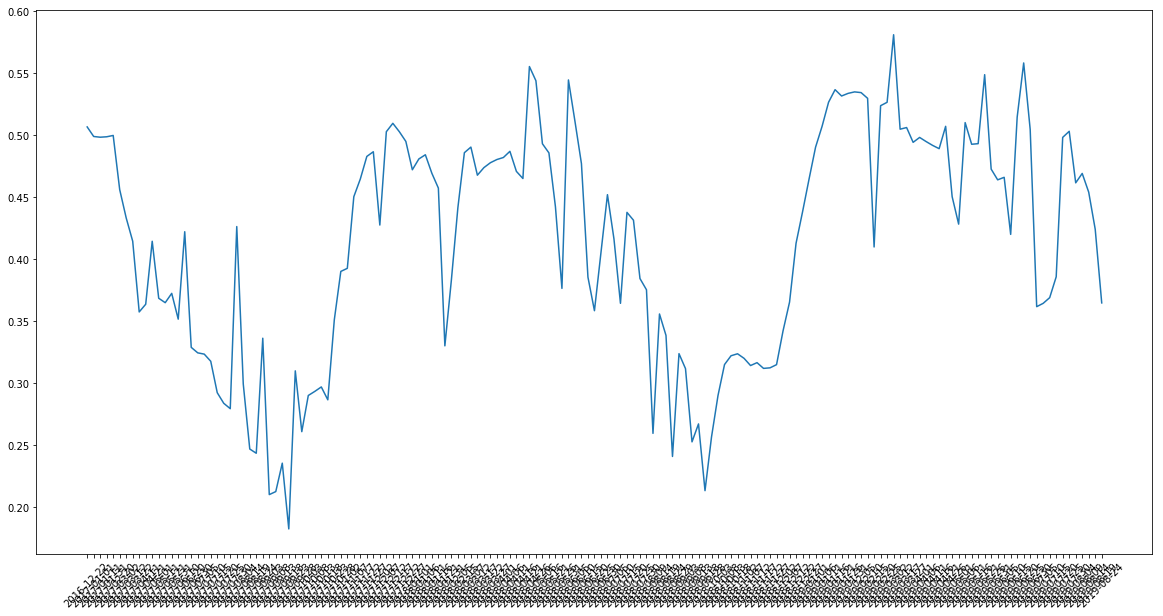

In [32]:
plt.figure(figsize=(20,10))
x = ndvi_dict["date_list"]
y = ndvi_dict["mean_ndvi_list"]
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

In [41]:

res = [] 
for idx in range(0, len(mean_ndvi_list)) : 
    if mean_ndvi_list[idx] < 0.24: 
        res.append(idx)
res

[28, 29, 30, 31, 95]

In [42]:

# date_list[31]  # 2017-09-23
# index 31 to 95 is for 17-18 season
date_list[95]

'2018-09-28'

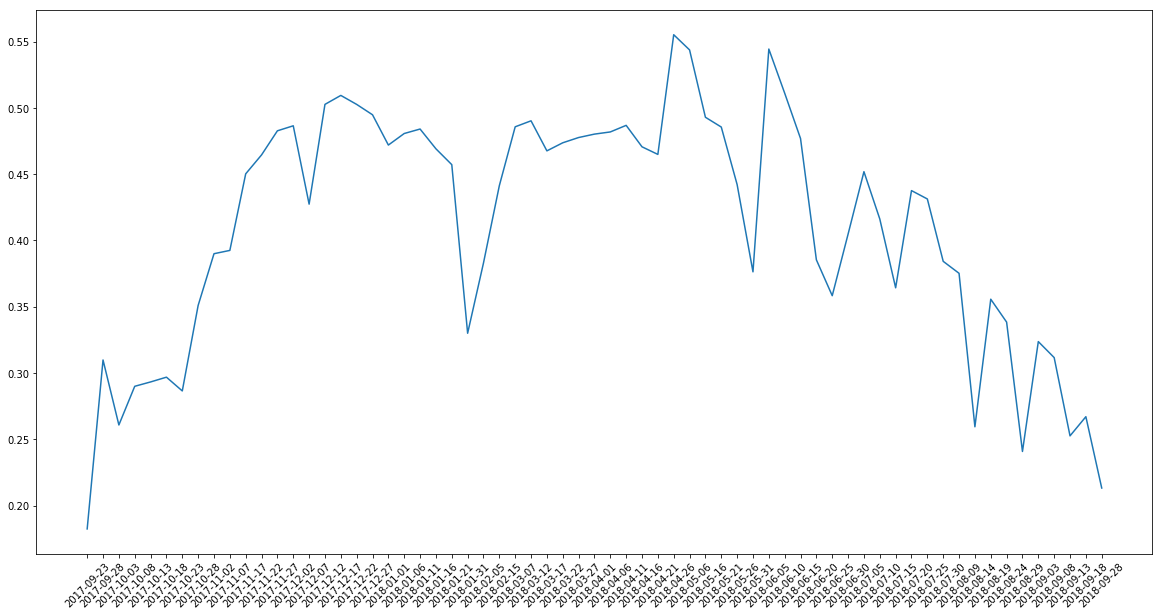

In [38]:
plt.figure(figsize=(20,10))
x = ndvi_dict["date_list"][31:96]
y = ndvi_dict["mean_ndvi_list"][31:96]
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

In [48]:
date_list[89]

'2018-08-24'

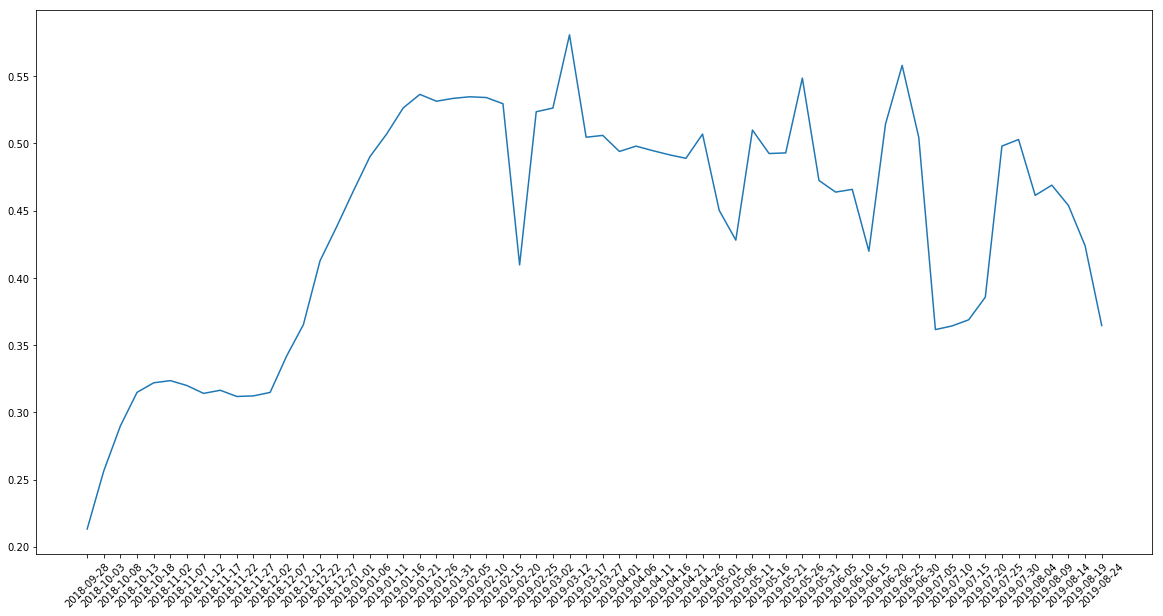

In [44]:
plt.figure(figsize=(20,10))
x = ndvi_dict["date_list"][95:]
y = ndvi_dict["mean_ndvi_list"][95:]
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

In [46]:
# fit NDVI function to the data

def NDVI_func(x, m, a, b, ti, tf):
    return m / ( 1 +  np.exp((-1) * a * (x - ti)))  -  m / ( 1 +  np.exp((-1) * b * (x - tf)))

In [99]:
# date_list[86]
date_list[-1]

'2019-08-24'

In [164]:
# date string to delta days 

# For 17-18 season
reference_date = datetime.strptime( date_list[31], "%Y-%m-%d")
days_elapsed_list = []
for i in list(range(31, 87)):
    do = datetime.strptime(date_list[i], "%Y-%m-%d")
    delta = do - reference_date
    delta_days = delta.days
    days_elapsed_list.append(delta_days)
    


In [76]:
# days_elapsed_list

In [179]:
date_list[31]


'2017-09-23'

In [165]:
# this is for 17-18 season, from 17.9.23 to 18.8.9
xdata = np.array( days_elapsed_list )
ydata = np.array( mean_ndvi_list[31:87] )
popt, pcov = curve_fit(NDVI_func, xdata, ydata)

In [180]:
xdata[-1]

320

In [182]:
m, a, b, ti, tf = popt[0], popt[1], popt[2], popt[3], popt[4]

In [184]:
from scipy.optimize import least_squares

def fun(x, t, y):
    m, a, b, ti, tf = x[0], x[1], x[2], x[3], x[4]
    return NDVI_func(t, m, a, b, ti, tf) - y
x0 = np.ones(5)
res_lsq = least_squares(fun, x0, args=(xdata, ydata))


In [186]:
m, a, b, ti, tf = res_lsq.x[0], res_lsq.x[1], res_lsq.x[2], res_lsq.x[3], res_lsq.x[4]
I = quad(NDVI_func, 0, xdata[-1], args=(m, a, b, ti, tf) )
I

(139.37929083973543, 1.7495038184866044e-08)

In [187]:
ydata

array([0.18238111, 0.30982503, 0.26079804, 0.28997579, 0.29326227,
       0.29685563, 0.28647593, 0.35097802, 0.39000088, 0.39248687,
       0.45025209, 0.46453744, 0.48271513, 0.48649579, 0.42738637,
       0.5026527 , 0.50941592, 0.50264156, 0.49481004, 0.47196704,
       0.48067996, 0.48405591, 0.46913707, 0.45718974, 0.32999113,
       0.38299724, 0.44134012, 0.48573399, 0.49025032, 0.46758771,
       0.4736774 , 0.47764203, 0.48022172, 0.48185691, 0.48682842,
       0.47064725, 0.46490762, 0.55519092, 0.54374063, 0.49293664,
       0.48555776, 0.4421702 , 0.37632176, 0.5443899 , 0.51112235,
       0.47690102, 0.38538283, 0.35832512, 0.40477812, 0.45187962,
       0.41619238, 0.36428261, 0.43761116, 0.43129325, 0.38424847,
       0.37520623])

In [ ]:
[0.3257062890950371, 0.32903671141932994, 0.3323270895901848, 0.33565034410532785, \
 0.33894307665965134, 0.36342237977420583, 0.3880543522975024, 0.41278877906939565, \
 0.43663540885728946, 0.45897359883084016, 0.4856493707965402, 0.49797871936770044, \
 0.5098548210719053, 0.5212953425505582, 0.5324899200130911, 0.5434579987736309, \
 0.5357973670258241, 0.5280921976355946, 0.5204324052614324, 0.5126789215733023, \
 0.5047919034957886, 0.4968404431553448, 0.48867096147116496, 0.4802848449524711, \
 0.46261891512309805, 0.501312412759837, 0.5752005783950581, 0.7116985864499036, \
 0.7436648491550895, 0.7746425456860486, 0.7777140017818002, 0.7806538329404943, \
 0.7836443375138675, 0.786678159938139, 0.7897900237756617, 0.7929732438396006, \
 0.7960000546539531, 0.783275065351935, 0.741580090452643, 0.6961471136878519, \
 0.671955497825847, 0.6463928443544051, 0.5536837665473714, 0.5262625198153889, \
 0.48711047260200274, 0.4612841346684624, 0.44203269744620605, 0.4381990918341805, \
 0.4339364320039749, 0.4081385633524726, 0.3809150236494401, 0.3670585753286586, \
 0.35046722783761863, 0.33439350145704605, 0.3228069361518411]


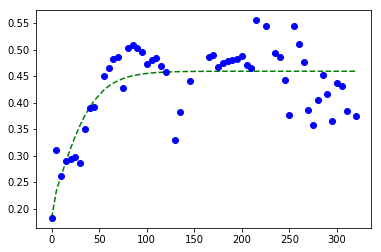

In [167]:
plt.plot(xdata, NDVI_func(xdata, *popt), 'g--')
plt.plot(xdata, ydata, 'bo')
plt.show()

In [183]:
I = quad(NDVI_func, 0, xdata[-1], args=(m, a, b, ti, tf) )
I

(139.3795549605219, 4.0380112921295215e-08)

In [169]:
integral_1718 = I[0]

In [157]:
# date string to delta days 

# For 17-18 season
reference_date = datetime.strptime( date_list[95], "%Y-%m-%d")
days_elapsed_list = []
for i in list(range(95, len(date_list))):
    do = datetime.strptime(date_list[i], "%Y-%m-%d")
    delta = do - reference_date
    delta_days = delta.days
    days_elapsed_list.append(delta_days)

In [84]:
# days_elapsed_list

In [158]:
# this is for 18-19 season, from 18.9.28 to 19.8.24
xdata = np.array( days_elapsed_list )
ydata = np.array( mean_ndvi_list[95:] )
popt, pcov = curve_fit(NDVI_func, xdata, ydata)

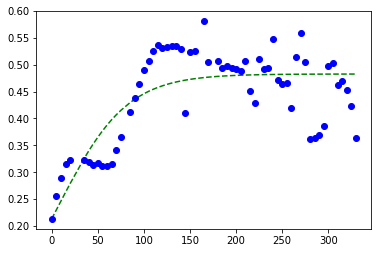

In [159]:
plt.plot(xdata, NDVI_func(xdata, *popt), 'g--')
plt.plot(xdata, ydata, 'bo')
plt.show()

In [96]:
len(date_list)-95

62

In [97]:
len(days_elapsed_list)

62

In [161]:
m, a, b, ti, tf = popt[0], popt[1], popt[2], popt[3], popt[4]
I = quad(NDVI_func, 0, xdata[-1], args=(m, a, b, ti, tf) )
I

(144.86037510525085, 1.5659733350549276e-06)

In [162]:
integral_1819 = I[0]

In [170]:
# 17-18 true proserpine yield = 66.0
# 18-19 true ???

from sklearn.linear_model import LinearRegression

X = np.array( [[1, integral_1718], [1,0]] )
Y = np.array( [66.0, 0] )
reg = LinearRegression().fit(X, Y)


In [176]:
reg.coef_

array([0.        , 0.47352713])

In [177]:
def predict_yield(x):
    return reg.coef_[1] * x

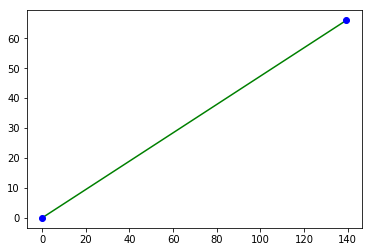

In [178]:
xx = np.array([0, integral_1718])
yy = np.array([0, 66.0])
plt.plot(xx, predict_yield(xx), 'g-')
plt.plot(xx, yy, 'bo')
plt.show()

In [98]:
res = []
for i in list(range(0,10)):
    if i % 2 == 0:
        res.append(None)
    else:
        res.append(i)
res

[None, 1, None, 3, None, 5, None, 7, None, 9]

In [101]:
str1 = [0,1,2,3,4]
try:
    str1.index(5)
except ValueError:
    print("error")
    

error


In [102]:
with open("../servercodes/T55KFT_sugarcane_positions.json", "r") as fp:
    tile_sugarcane_position_dict = json.load(fp)

In [103]:
len(tile_sugarcane_position_dict)

1

In [104]:
sugarcane_pos = tile_sugarcane_position_dict["sugarcane_positions"]

In [105]:
len(sugarcane_pos)

3528183

In [107]:
sugarcane_pos[100]

[1917, 1297]

In [108]:
sugarcane_pos.index([1917, 1297])

100

In [109]:
df = pd.DataFrame([[1,2,3], [3,4,5]])
df

,0,1,2
0,1,2,3
1,3,4,5


In [112]:
df.mean(axis=0).values.tolist()

[2.0, 3.0, 4.0]

In [115]:
ar = np.divide( np.subtract(df[0], df[1]), np.add(df[0], df[1]) )
ar

0   -0.333333
1   -0.142857
Name: 0, dtype: float64

In [116]:
np.mean(ar)

-0.23809523809523808

In [117]:
df2 = pd.DataFrame([[3,3,3], [6,6,6]])

In [119]:
pd.concat([df, df2], axis=0)

,0,1,2
0,1,2,3
1,3,4,5
0,3,3,3
1,6,6,6


In [120]:
with open("../servercodes/T55KFT_mean_ndvi_total_2.json", "r") as fp:
    ndvi_dict = json.load(fp)

date_list = ndvi_dict["date_list"]
mean_ndvi_list = ndvi_dict["mean_ndvi"]

In [133]:
date_list[27]

'2016-12-22'

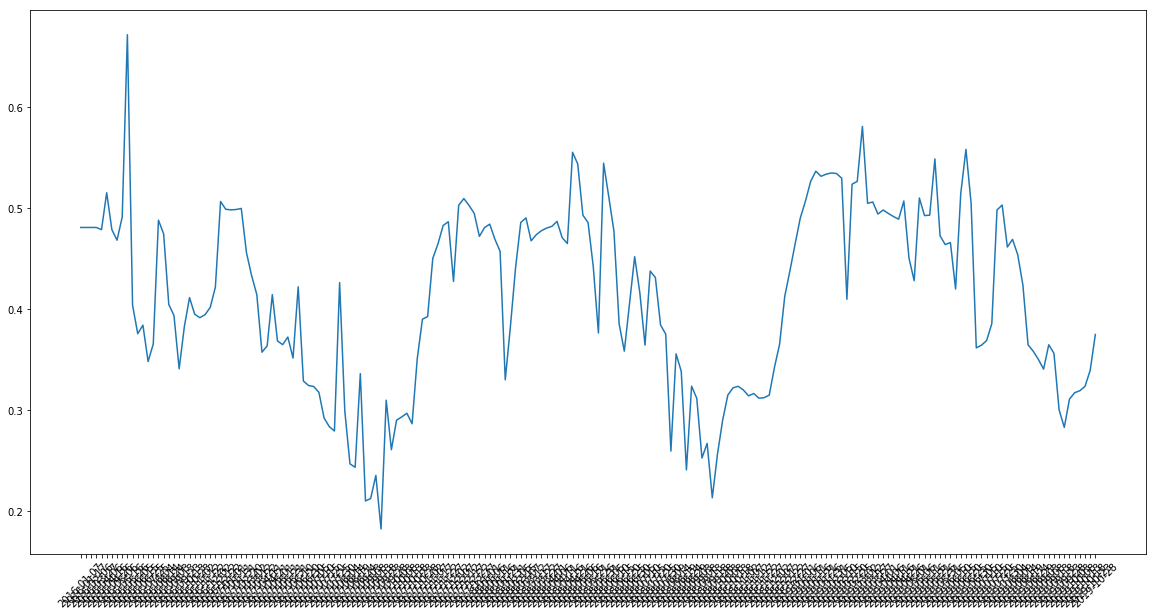

In [132]:
plt.figure(figsize=(20,10))
x = date_list
y = mean_ndvi_list
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

In [135]:
date_list[180]

'2019-08-09'

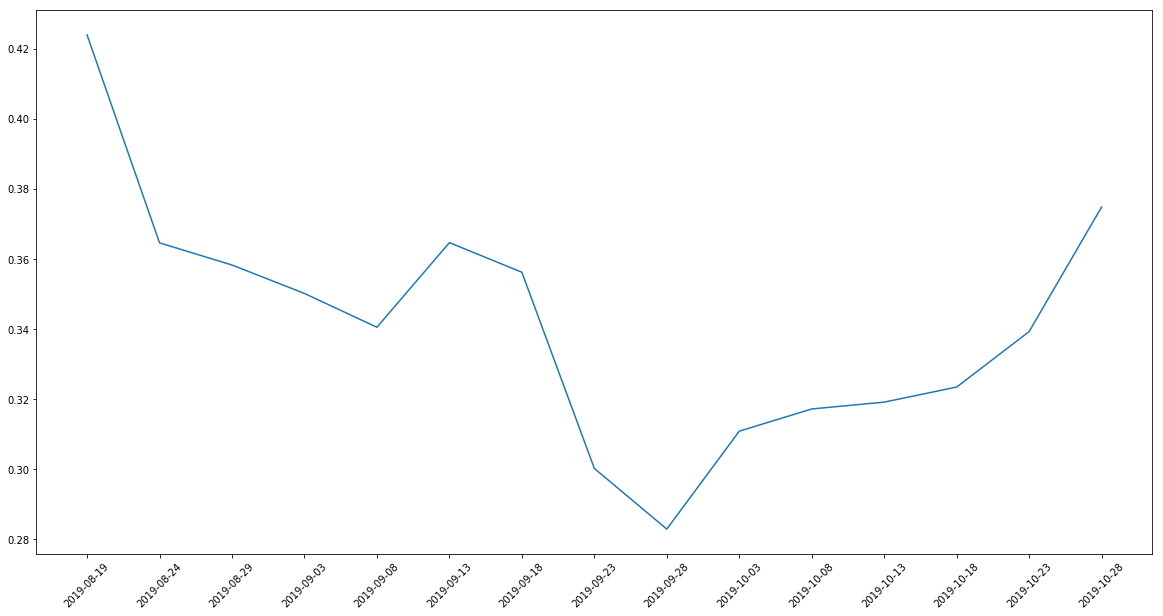

In [136]:
plt.figure(figsize=(20,10))
x = date_list[182:]
y = mean_ndvi_list[182:]
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# API parameters
"""
{
"ratoonStartDate" : "2017-09-28",
"harvestStartDate" : "2017-11-15",
"latlonlist" : [ { "lon": 148.150643769079208, "lat": -20.02497714184467 }, 
                { "lon": 148.151567620321799, "lat":-20.024663182667305 }, 
                { "lon": 148.151910966339955, "lat":-20.030921304516287 }, 
                { "lon": 148.150972282445677, "lat":-20.031237148182278 }, 
                { "lon": 148.150643769079208, "lat":-20.02497714184467 } ]
}
"""

{
"futureDate" : "2019-11-05",
"drought": 1
}

[148.150643769079208, -20.02497714184467, 148.151567620321799, -20.024663182667305,148.151910966339955, -20.030921304516287, 148.150972282445677, -20.031237148182278, 148.150643769079208, -20.02497714184467 ]



In [148]:
yd = [0.28291692513930056, 0.3108605215609208, 0.31720381996603425, 0.3191518377043128, \
 0.32345840970276507, 0.33928363349019464, 0.3748444724425409, 0.36635931653480674]
yd2 = [0.28291692513930056, 0.3108605215609208, 0.31720381996603425, 0.3191518377043128, \
       0.32345840970276507, 0.33928363349019464, 0.3748444724425409, 0.35303842457711915]

from scipy.optimize import least_squares

xdata = [0, 5, 10, 15, 20, 25, 30, 38]
ydata = yd2

def fun(x, t, y):
    m, a, b, ti, tf = x[0], x[1], x[2], x[3], x[4]
    return NDVI_func(t, m, a, b, ti, tf) - y
x0 = np.ones(5)
res_lsq = least_squares(fun, x0, args=(xdata, ydata))


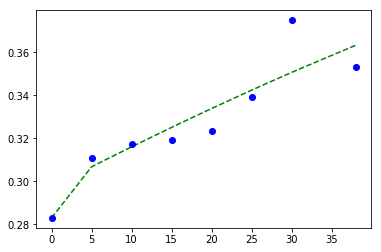

In [149]:
plt.plot(xdata, NDVI_func(xdata, *res_lsq.x), 'g--')
plt.plot(xdata, ydata, 'bo')
plt.show()

In [150]:
m, a, b, ti, tf = res_lsq.x[0], res_lsq.x[1], res_lsq.x[2], res_lsq.x[3], res_lsq.x[4]
I = quad(NDVI_func, 0, xdata[-1], args=(m, a, b, ti, tf) )
I

(12.591117952692787, 1.265043746068978e-11)

In [189]:
lat_long_point1 = [-19.893321306080015, 147.95529899839866]
lat_long_point2 = [-19.893321306080015, 149.01671779369045]

geopy.distance.geodesic(lat_long_point1, lat_long_point2).meters

111148.83530972402

In [190]:
111148 - 10980*10

1348

In [191]:
with open("../servercodes/T55KFT_sugarcane_positions.json", "r") as fp:
    tile_sugarcane_position_dict = json.load(fp)

In [192]:
sugarcane_pos = tile_sugarcane_position_dict["sugarcane_positions"]

In [193]:
sugarcane_pos[:5]

[[1913, 1314], [1913, 1315], [1913, 1316], [1913, 1317], [1913, 1318]]

In [194]:
if [1913, 1314] in sugarcane_pos:
    print(True)

True


In [195]:
year = 2019
str(year)[2:]

'19'